In [125]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, f1_score

from sklearn.impute import SimpleImputer
from scipy import stats


In [15]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888-2023/main/lab3-modelling/bank-additional-full.csv', delimiter=';')


In [21]:
list_x = []

df_list = df_bank.to_dict(orient="records")
list_x.append(df_list)

list_x[0]

[{'age': 56,
  'job': 'housemaid',
  'marital': 'married',
  'education': 'basic.4y',
  'default': 'no',
  'housing': 'no',
  'loan': 'no',
  'contact': 'telephone',
  'month': 'may',
  'day_of_week': 'mon',
  'duration': 261,
  'campaign': 1,
  'pdays': 999,
  'previous': 0,
  'poutcome': 'nonexistent',
  'emp.var.rate': 1.1,
  'cons.price.idx': 93.994,
  'cons.conf.idx': -36.4,
  'euribor3m': 4.857,
  'nr.employed': 5191.0,
  'y': 'no'},
 {'age': 57,
  'job': 'services',
  'marital': 'married',
  'education': 'high.school',
  'default': 'unknown',
  'housing': 'no',
  'loan': 'no',
  'contact': 'telephone',
  'month': 'may',
  'day_of_week': 'mon',
  'duration': 149,
  'campaign': 1,
  'pdays': 999,
  'previous': 0,
  'poutcome': 'nonexistent',
  'emp.var.rate': 1.1,
  'cons.price.idx': 93.994,
  'cons.conf.idx': -36.4,
  'euribor3m': 4.857,
  'nr.employed': 5191.0,
  'y': 'no'},
 {'age': 37,
  'job': 'services',
  'marital': 'married',
  'education': 'high.school',
  'default': 'no'

In [3]:
num_rows_with_nan = df_bank.isna().any(axis=1).sum()
num_rows_with_nan


np.int64(0)

In [4]:
df_bank.shape

(41188, 21)

In [5]:
df_cleaned = df_bank.dropna()

In [6]:
df_cleaned.shape

(41188, 21)

In [22]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
le = LabelEncoder()
df_bank['y'] = le.fit_transform(df_bank['y'])

df_bank_dummies = pd.get_dummies(df_bank)
df_bank_dummies.drop("duration", axis=1, inplace=True)

df_bank_dummies.shape[1], df_bank_dummies.columns.to_list()

(63,
 ['age',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'y',
  'job_admin.',
  'job_blue-collar',
  'job_entrepreneur',
  'job_housemaid',
  'job_management',
  'job_retired',
  'job_self-employed',
  'job_services',
  'job_student',
  'job_technician',
  'job_unemployed',
  'job_unknown',
  'marital_divorced',
  'marital_married',
  'marital_single',
  'marital_unknown',
  'education_basic.4y',
  'education_basic.6y',
  'education_basic.9y',
  'education_high.school',
  'education_illiterate',
  'education_professional.course',
  'education_university.degree',
  'education_unknown',
  'default_no',
  'default_unknown',
  'default_yes',
  'housing_no',
  'housing_unknown',
  'housing_yes',
  'loan_no',
  'loan_unknown',
  'loan_yes',
  'contact_cellular',
  'contact_telephone',
  'month_apr',
  'month_aug',
  'month_dec',
  'month_jul',
  'month_jun',
  'month_mar',
  'month_may',
  'month_nov',
  '

In [17]:
def imbalance(minor_example, example):
    return (minor_example / example) * 100

In [19]:
df_bank['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [21]:
df_bank['y'].count()

np.int64(41188)

In [22]:
imbalance(4640, 41188)

11.265417111780131

In [13]:
df_bank_copy = df_bank.copy()

Explanation:
Missing Values: Replaced with the mean for numerical features and the most frequent value for categorical features.
Categorical Encoding: One-Hot Encoding for all categorical columns.
Feature Scaling: Standardized numerical columns (important for algorithms like logistic regression, SVM, etc.).
Train-Test Split: Divided the dataset for model training and testing.

Updated Preprocessing Guide
Step-by-Step Process:

Handle Missing Values
Encode Categorical Variables
Feature Scaling
Feature Engineering (New Step)
Outlier Detection and Removal (New Step)
Train-Test Split
Cross-Validation

In [70]:
# PREPROCESSING
# Step 1: Handle Missing Values
# Fill missing values for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

numerical_cols = df_bank_copy.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df_bank_copy.select_dtypes(include=["object"]).columns

df_bank_copy[numerical_cols] = num_imputer.fit_transform(df_bank_copy[numerical_cols])
df_bank_copy[categorical_cols] = cat_imputer.fit_transform(df_bank_copy[categorical_cols])

# Step 2: Encode Categorical Variables
df_bank_copy = pd.get_dummies(df_bank_copy, columns=categorical_cols)

# Step 3: Feature Scaling
scaler = StandardScaler()
df_bank_copy[numerical_cols] = scaler.fit_transform(df_bank_copy[numerical_cols])

# Step 4: Feature Engineering
# Example: Create a new feature "age_group" from "age"
# df_bank_copy['age_group'] = pd.cut(df_bank_copy['age'], bins=[0, 18, 35, 50, 65, 100], labels=["teen", "young_adult", "adult", "middle_aged", "senior"])

# Add polynomial features for numeric columns
# for col in numerical_cols:
#     df_bank_copy[f'{col}_squared'] = df_bank_copy[col] ** 2
#     df_bank_copy[f'{col}_cubed'] = df_bank_copy[col] ** 3

# Step 5: Outlier Detection and Removal
# Z-score method for numerical columns (removes rows with Z-score > 3)
df_bank_copy = df_bank_copy[(np.abs(stats.zscore(df_bank_copy[numerical_cols])) < 3).all(axis=1)]

# Step 6: Train-Test Split
X = df_bank_copy.drop("y", axis=1)  # Replace "target_column" with your actual target column
y = df_bank_copy["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [14]:
X = df_bank_copy.drop("y", axis=1)  # Replace "target_column" with your actual target column
y = df_bank_copy["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [17]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Encoding 'y' to numeric (0 and 1)
y_test = label_encoder.transform(y_test)  # Transforming 'y_test' accordingly

In [15]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [18]:
X_train.dtypes

age                 int64
job               float64
marital           float64
education         float64
default           float64
housing           float64
loan              float64
contact           float64
month             float64
day_of_week       float64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome          float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [24]:
class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features)

In [35]:
df_inner = df_bank.copy()

X = df_inner.drop("y", axis=1)  # Replace "target_column" with your actual target column
y = df_inner["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

dummy_clf = DummyClassifier(strategy="stratified", random_state=50)
f1_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring='f1_weighted')

average_f1 = f1_scores.mean()
average_f1


np.float64(0.7970828831183591)

In [45]:
df_inner = df_bank.copy()

X = df_inner.drop("y", axis=1)
y = df_inner["y"]

cat_features = ["pdays", "previous"]

features = ["duration","campaign", "pdays","previous", "emp.var.rate","cons.price.idx",
            "cons.conf.idx","euribor3m","nr.employed"]

# features = ["pdays","previous", "emp.var.rate"]

X_df = df_inner[features].head()

encoder = OneHotEncoderCategoricalFeatures(cat_features)
X_oho = encoder.transform(X_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

clf = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=60)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# scores = cross_val_score(clf, X_train, y_test, cv=10, scoring='f1_weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# average_f1 = scores.mean()
# average_f1

f1


np.float64(0.8963230193099276)

In [19]:
# Step 2: Define the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=60)

# Step 3: Perform 10-fold cross-validation and calculate the average F1 score
# f1_scorer = make_scorer(f1_score, average='weighted')
# f1_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=f1_scorer)
# average_f1_score = round(f1_scores.mean(), 2)

# Fit the model to the training data
clf.fit(X_train, y_train)

feature_importances = clf.feature_importances_

# Step 4: Create a DataFrame to display feature importances along with the feature names
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Step 5: Sort the features by importance and get the top 3 features
top_3_features = features_df.sort_values(by='Importance', ascending=False).head(4)

# Step 3: Predict on the test set
# y_pred = clf.predict(X_test)

# Step 4: Calculate the F1 score on the test set
# test_f1_score = f1_score(y_test, y_pred, average='weighted')

# Step 5: Report the F1 score rounded to two decimal places
# test_f1_score_rounded = round(test_f1_score, 2)

# Print the average F1 score
# "Average F1 Score:", average_f1_score, test_f1_score_rounded, 
top_3_features

,Feature,Importance
10,duration,0.422687
18,euribor3m,0.142831
19,nr.employed,0.102923
0,age,0.082911


In [167]:
df_bank['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [151]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


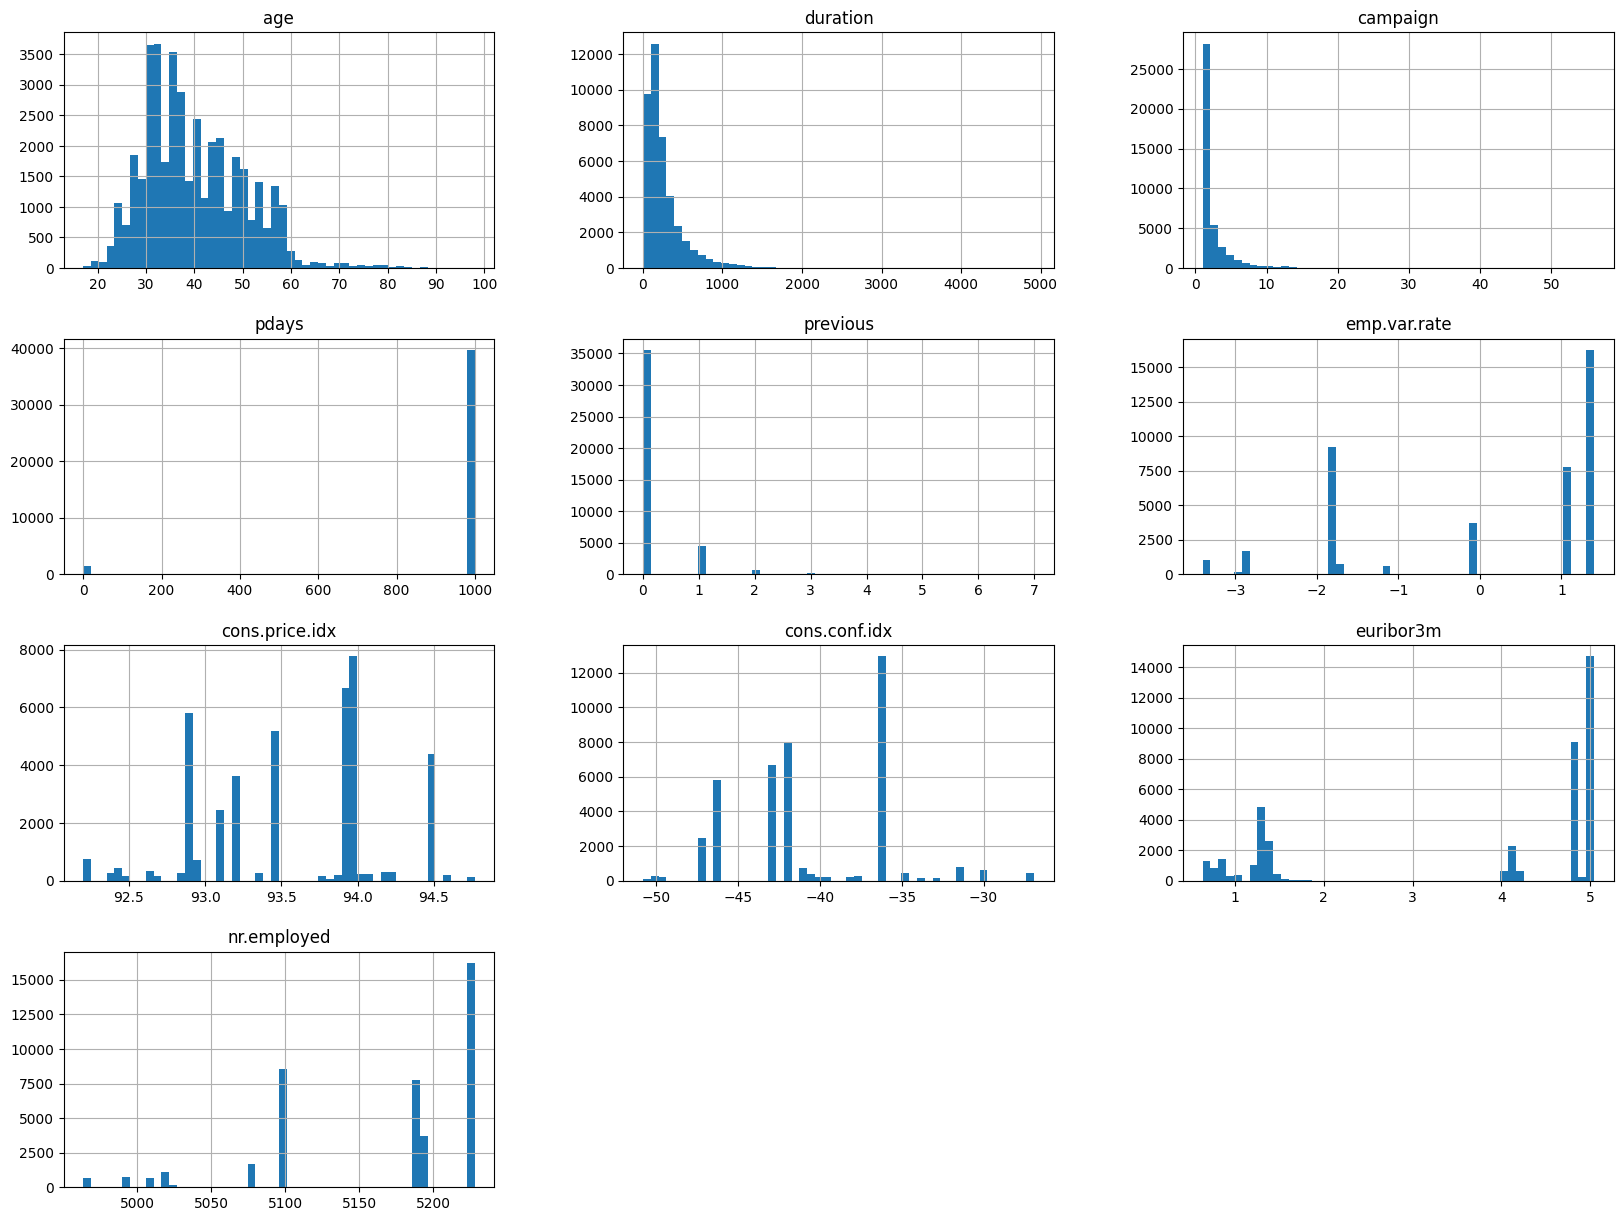

In [152]:
_ = df_bank.hist(bins=50, figsize=(20,15))

In [153]:
# Create separate training and test sets. we'll use the training set for steps 3--6
train_set, test_set = train_test_split(df_bank, test_size=0.2, random_state=50)
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
train_set.shape, test_set.shape

((32950, 21), (8238, 21))

In [154]:
df_train_set = train_set.copy()

In [155]:
features = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate" , "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "marital" ]
df_train_set[features].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital
33479,32,548,2,999,0,-1.8,92.893,-46.2,1.291,5099.1,married
36397,31,217,1,999,0,-2.9,92.963,-40.8,1.262,5076.2,married
10925,28,466,2,999,0,1.4,94.465,-41.8,4.962,5228.1,single
8877,41,21,1,999,0,1.4,94.465,-41.8,4.866,5228.1,married
32199,44,318,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,single


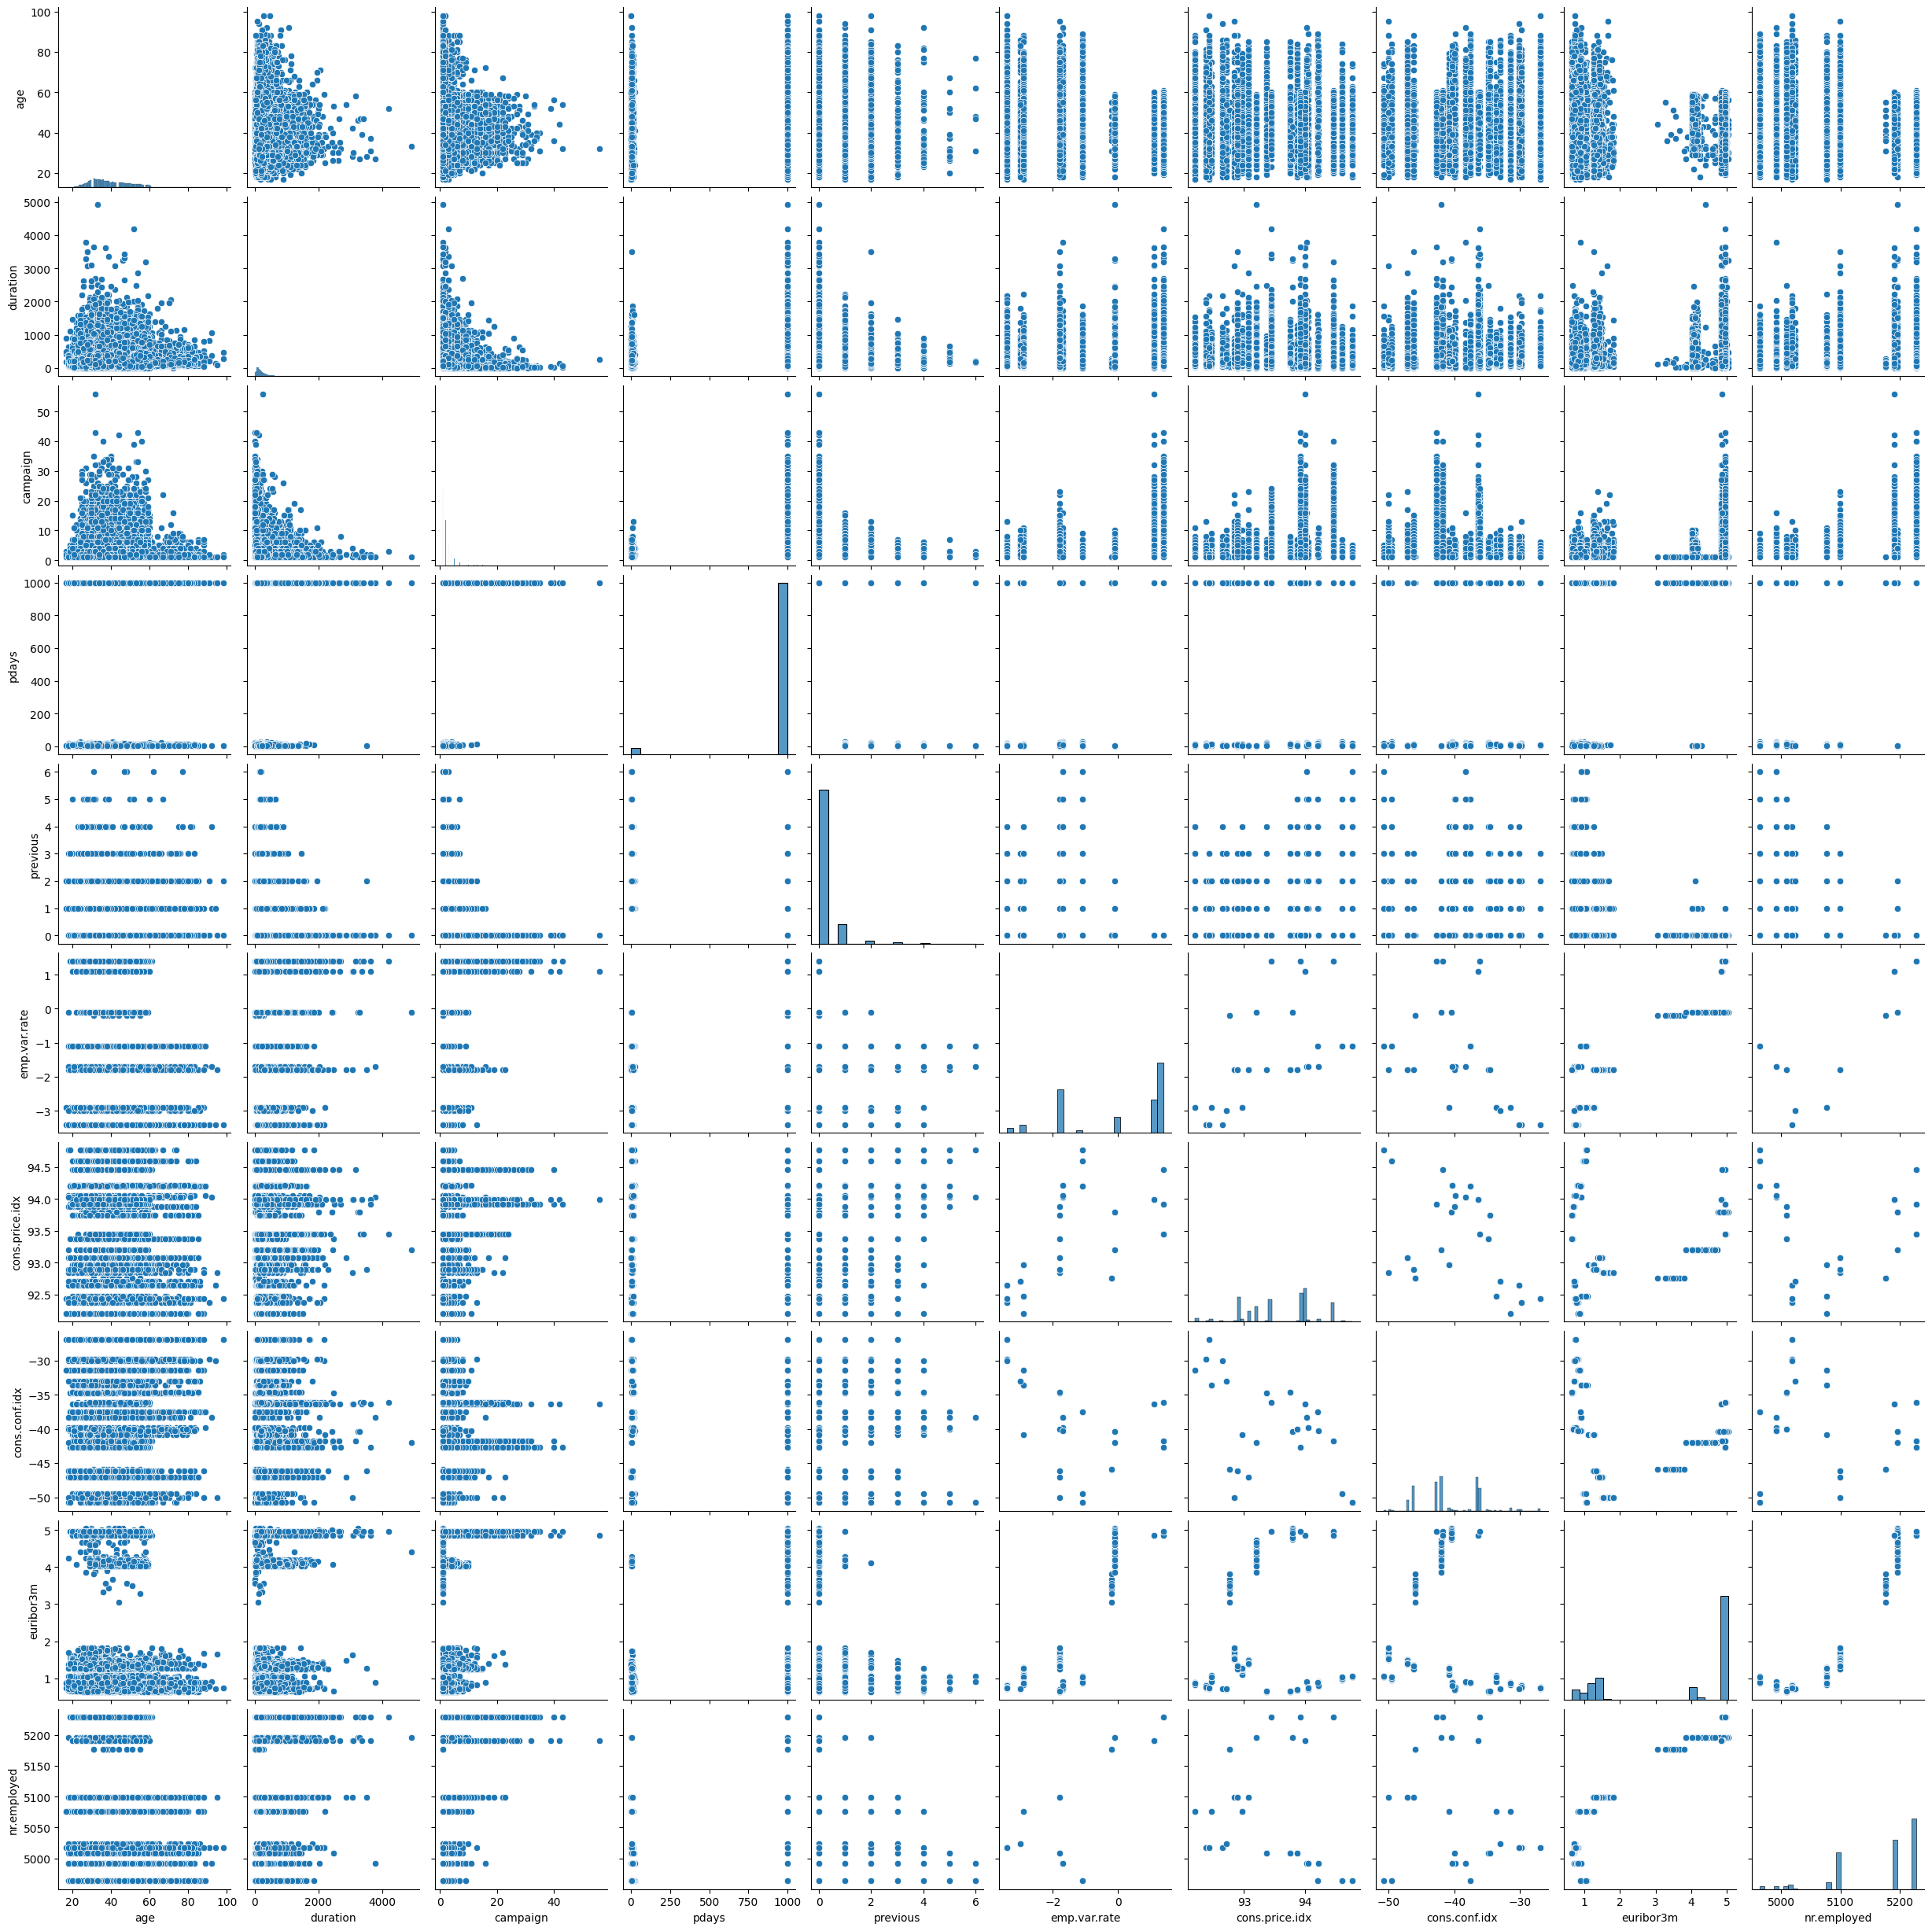

In [156]:
sns_plot = sns.pairplot(df_train_set[features])

In [170]:
cat_features = ['pdays', 'previous']
corr = df_train_set[cat_features+['nr.employed']].corr()
corr['nr.employed']

pdays          0.368493
previous      -0.496802
nr.employed    1.000000
Name: nr.employed, dtype: float64

In [198]:
df = test_set.copy()
# Most algorithms cannot work with missing values. Three main ways to deal with them:
# 1. Drop rows
# 2. Drop features with NaNs
# 3. Fill missing values
# As we have very few missing values, let's drop the rows
print("Number of rows before dropping NaNs: %d" % len(df))
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))
# Separate features from outcomes
y_df = df['nr.employed'].copy()
X_df = df[features].copy()

Number of rows before dropping NaNs: 8238
Number of rows after dropping NaNs: 8238


In [199]:
# We previously observed that some of the features were categorical.
# Two main ways to deal with these: OrdinalEncoder() or OneHotEncoding()

# Let's use OneHotEncoding for the categories ('Category', 'Paid', 'Type')
# As we will later want to transform the test set, let's follow good practice and create a custom transformer for a sklearn pipeline

# This is an example of how it would be done. Since this is a very simple transformation, there's a better way of doing it
# using ColumnTransformer. We show it below

class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features)

In [200]:
cat_features = ['nr.employed', 'marital']

encoder = OneHotEncoderCategoricalFeatures(cat_features)
X_oho = encoder.transform(X_df)
X_oho

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed_4963.6,...,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1,marital_divorced,marital_married,marital_single,marital_unknown
6859,40,51,2,999,0,1.1,93.994,-36.4,4.857,False,...,False,False,False,True,False,False,False,True,False,False
18440,42,30,6,999,0,1.4,93.918,-42.7,4.968,False,...,False,False,False,False,False,True,False,True,False,False
9521,35,77,1,999,0,1.4,94.465,-41.8,4.961,False,...,False,False,False,False,False,True,True,False,False,False
15778,27,204,3,999,0,1.4,93.918,-42.7,4.960,False,...,False,False,False,False,False,True,False,False,True,False
34235,32,247,2,999,0,-1.8,92.893,-46.2,1.266,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,29,1318,3,999,0,1.4,94.465,-41.8,4.961,False,...,False,False,False,False,False,True,False,False,True,False
21407,45,245,1,999,0,1.4,93.444,-36.1,4.963,False,...,False,False,False,False,False,True,False,True,False,False
25439,31,180,3,999,0,-0.1,93.200,-42.0,4.120,False,...,False,False,False,False,True,False,False,False,True,False
28377,35,150,1,999,0,-1.8,93.075,-47.1,1.435,False,...,False,True,False,False,False,False,False,True,False,False


In [201]:
num_features = ['duration']

# Use column transformer: numerical features will be standardised; categorical features will be transformed with OHO

# We can use a ColumnTransformer to transform only some types of columns in different ways
colTransformer = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
    )

X_processed = colTransformer.fit_transform(X_df)
X_processed.shape

(8238, 24)

In [202]:
X_processed[0,:]

array([-8.22991867e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.00000000e+01,  2.00000000e+00,  9.99000000e+02,  0.00000000e+00,
        1.10000000e+00,  9.39940000e+01, -3.64000000e+01,  4.85700000e+00])

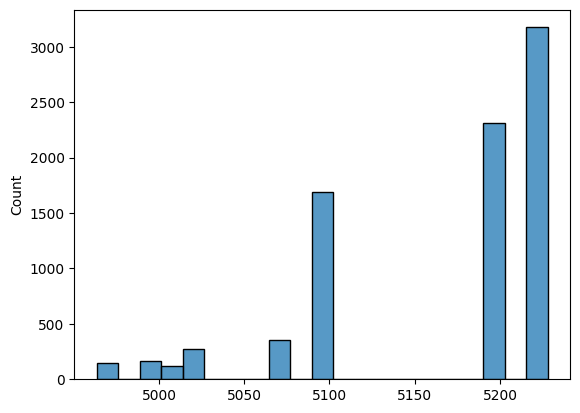

In [203]:
y = y_df.values
_ = sns.histplot(y, kde=False)

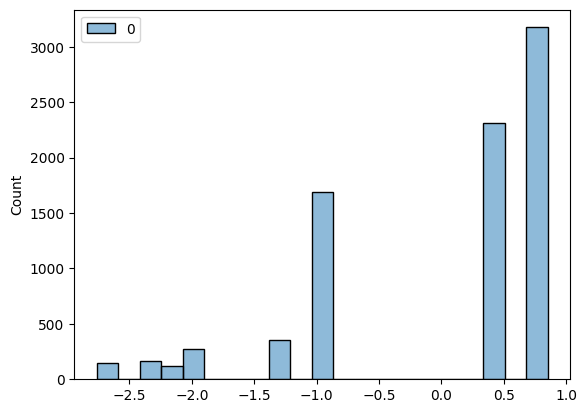

In [204]:
y_transformer = StandardScaler()  # we'll need this scaler for the test set later!
y = y_transformer.fit_transform(y.reshape(-1,1))
_ = sns.histplot(y, kde=False)

In [205]:
clf = DecisionTreeRegressor()  # Decision tree
clf.fit(X_processed, y)
print("RMSE of the model = %1.4g" % np.sqrt(mse(y, clf.predict(X_processed))))

RMSE of the model = 7.251e-15


In [206]:
dummy_clf = DummyRegressor(strategy='mean')
dummy_scores = cross_val_score(dummy_clf, X_processed, y.ravel(), cv=10, scoring = make_scorer(mse))

print("Dummy RMSE: %0.8f +/- %0.8f" % (np.sqrt(dummy_scores).mean(), np.sqrt(dummy_scores).std()))

Dummy RMSE: 0.99963465 +/- 0.03147850


In [207]:
clf = RandomForestRegressor()
clf.fit(X_processed, y)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

[20 23  6 11 21  2 22 10  1  3  4  5 19  9  8  0 16 17 18 12 14 13 15  7]


In [208]:
# Let's get the attibute names:

extra_attribs = ["emp.var.rate" , "cons.price.idx", "campaign", "cons.conf.idx", "euribor3m", "nr.employed", "default", "marital"] # the ones we didn't modify in the transformer
cat_encoder = colTransformer.named_transformers_['cat']
cat_oho_attributes = oho_categories = [item for sublist in cat_encoder.categories_ for item in sublist]
feat_names = num_features + cat_oho_attributes + extra_attribs

In [209]:
max(indices)

np.int64(23)

In [210]:
len(feat_names)

24

In [211]:
X_processed.shape[1]

24

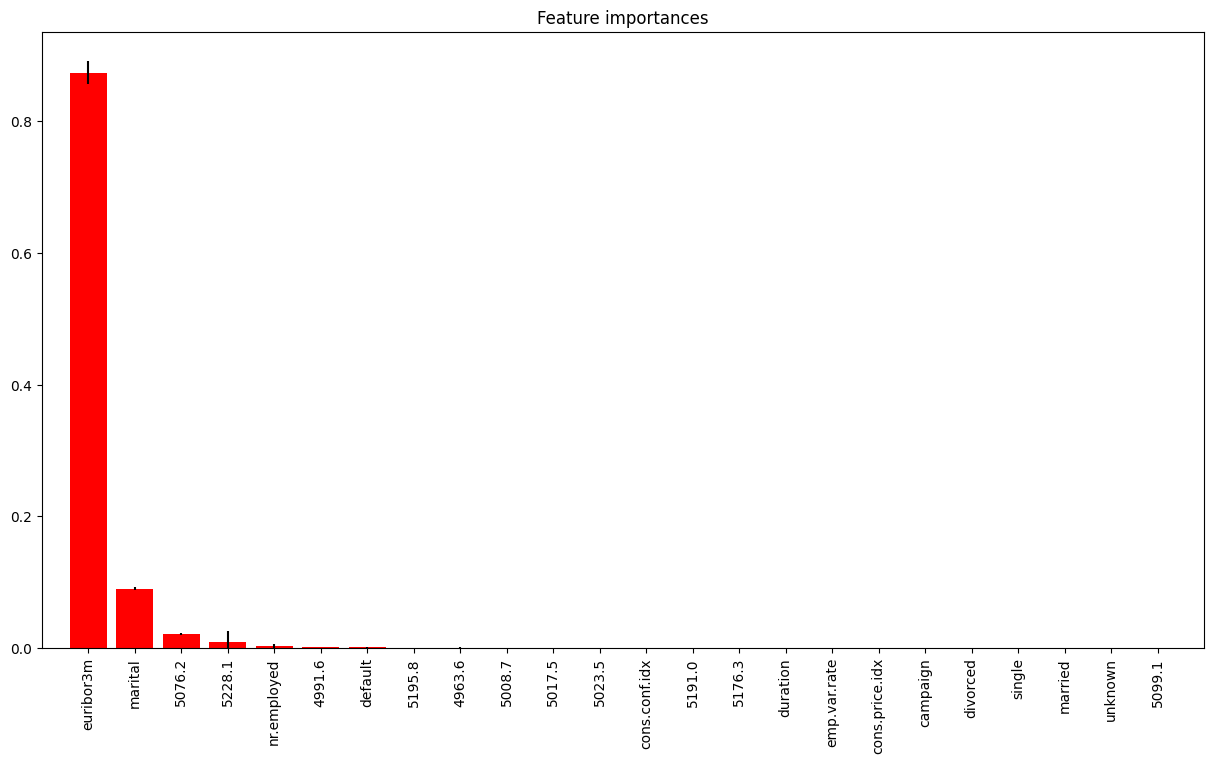

In [212]:
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X_processed.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_processed.shape[1]), np.array(feat_names)[indices], rotation=90)
plt.xlim([-1, X_processed.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

In [213]:
outcomes_of_interest = ["nr.employed", "marital"]
n_bins = 20

y_df = df[outcomes_of_interest].copy()
y_df["nr.employed"], bins = pd.qcut(y_df["nr.employed"], n_bins, duplicates='drop', retbins=True)

outcomesLabelEncoder = LabelEncoder()
y_df['nr.employed'] = outcomesLabelEncoder.fit_transform(y_df['nr.employed'])

y_df['id'] = range(1, len(df) + 1)

y_df.head()

,nr.employed,marital,id
6859,3,married,1
18440,5,married,2
9521,5,divorced,3
15778,5,single,4
34235,2,single,5


In [214]:
y = y_df['nr.employed'].values.T

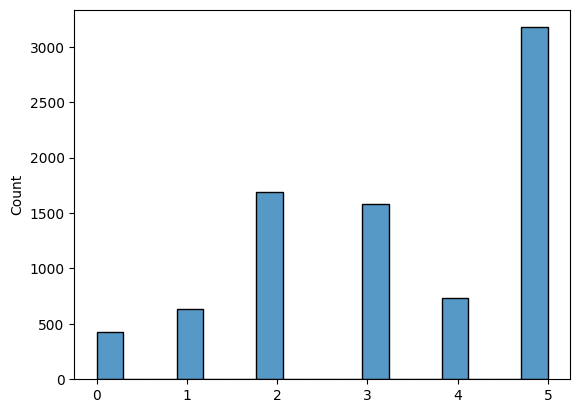

In [215]:
_ = sns.histplot(y, kde=False)  # our distribution of labels

In [216]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_processed, y)
print("Dummy ACC: %.2f" % acc(y, dummy_clf.predict(X_processed)))

Dummy ACC: 0.25


In [218]:

rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=60)

# Perform 10-fold cross-validation and compute F1-score
f1_scores = cross_val_score(rf, X_processed, y, cv=10)

# Report the average F1-score rounded to 2 decimal places
print(f"Average F1-score: {f1_scores.mean():.2f}")
features, f1_scores

Average F1-score: 1.00


(['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'marital'],
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.99878641, 1.        , 1.        , 1.        ]))

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, make_scorer

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/nnoromiv/CE888-2023/refs/heads/main/lab3-modelling/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')  # The dataset uses ';' as a separator

# Step 2: Preprocess the data
# Separate features (X) and target variable (y)
X = df.drop(columns=["y"])  # Assuming "y" is the target column
y = df["y"]

# Convert target variable to binary (yes/no → 1/0)
y = y.map({"yes": 1, "no": 0})

# Convert categorical features into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Step 4: Perform 10-fold cross-validation with DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified", random_state=50)
f1_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))

# Step 5: Report the average F1 score with 2 decimal places
avg_f1_score = f1_scores.mean()
print(f"Average F1 Score: {avg_f1_score:.2f}")

Average F1 Score: 0.12


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/nnoromiv/CE888-2023/refs/heads/main/lab3-modelling/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')  # The dataset uses ';' as a separator

# Step 2: Preprocess the data
# Separate features (X) and target variable (y)
X = df.drop(columns=["y"])  # Assuming "y" is the target column
y = df["y"].map({"yes": 1, "no": 0})  # Convert target variable to binary (yes → 1, no → 0)

# Convert categorical features into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Step 4: Perform 10-fold cross-validation with RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=50)
f1_scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))

# Step 5: Report the average F1 score with 2 decimal places
avg_f1_score = f1_scores.mean()
print(f"Average F1 Score: {avg_f1_score}")

Average F1 Score: 0.3988724125436169


In [14]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/nnoromiv/CE888-2023/refs/heads/main/lab3-modelling/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')  # The dataset uses ';' as a separator

# CLEAN DATASET

# Step 2: Preprocess the data
# Separate features (X) and target variable (y)
X = df.drop(columns=["y"])  # Assuming "y" is the target column
y = df["y"].map({"yes": 1, "no": 0})  # Convert target variable to binary (yes → 1, no → 0)

# Convert categorical features into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Step 4: Perform 10-fold cross-validation with RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=8)
f1_scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))

# Step 5: Report the average F1 score with 2 decimal places
avg_f1_score = f1_scores.mean()
print(f"Average F1 Score: {avg_f1_score}")

Average F1 Score: 0.3993476809832583


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/nnoromiv/CE888-2023/refs/heads/main/lab3-modelling/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')  # The dataset uses ';' as a separator

# Step 2: Preprocess the data
# Separate features (X) and target variable (y)
X = df.drop(columns=["y"])  # Assuming "y" is the target column
y = df["y"].map({"yes": 1, "no": 0})  # Convert target variable to binary (yes → 1, no → 0)

# Convert categorical features into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Step 4: Train the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=60)
rf_clf.fit(X_train, y_train)

# Step 5: Make predictions and compute F1 score
y_pred = rf_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Step 6: Print the F1 score rounded to two decimal places
print(f"F1 Score on Test Set: {f1}")

F1 Score on Test Set: 0.33


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/nnoromiv/CE888-2023/refs/heads/main/lab3-modelling/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')  # The dataset uses ';' as a separator

# Step 2: Preprocess the data
# Separate features (X) and target variable (y)
X = df.drop(columns=["y"])  # Assuming "y" is the target column
y = df["y"].map({"yes": 1, "no": 0})  # Convert target variable to binary (yes → 1, no → 0)

# Convert categorical features into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Step 4: Train the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=60)
rf_clf.fit(X_train, y_train)

# Step 5: Extract Feature Importances
feature_importances = pd.DataFrame(
    {'Feature': X.columns, 'Importance': rf_clf.feature_importances_}
)

# Step 6: Get the Top 3 Most Important Features
top_3_features = feature_importances.sort_values(by="Importance", ascending=False).head(5)

# Print the top 3 features
print("Top 3 Features:")
print(top_3_features)

Top 3 Features:
             Feature  Importance
1           duration    0.341760
8          euribor3m    0.116007
9        nr.employed    0.112152
3              pdays    0.064817
52  poutcome_success    0.050599


In [8]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/nnoromiv/CE888-2023/refs/heads/main/lab3-modelling/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')  # The dataset uses ';' as a separator

# Count the number of features (excluding the target variable "y")
num_features = df.shape[1] - 1  # Subtract 1 to exclude the target column

print(f"Number of features in the dataset: {num_features}")

Number of features in the dataset: 20


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/nnoromiv/CE888-2023/refs/heads/main/lab3-modelling/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')  # The dataset uses ';' as a separator

# Step 2: Preprocess the data
X = df.drop(columns=["y"])  # Features
y = df["y"].map({"yes": 1, "no": 0})  # Convert target to binary

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Step 4a: Train Dummy Classifier (stratified)
dummy_clf = DummyClassifier(strategy="stratified", random_state=60)
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
f1_dummy = f1_score(y_test, y_pred_dummy)

# Step 4b: Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=60)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)

# Step 5: Print results
print(f"F1 Score (Dummy Classifier): {f1_dummy:.2f}")
print(f"F1 Score (Random Forest): {f1_rf:.2f}")

# Step 6: Compare the results
if f1_rf > f1_dummy:
    print("✅ Random Forest performs better than Dummy Classifier!")
else:
    print("❌ Random Forest does not outperform Dummy Classifier.")

F1 Score (Dummy Classifier): 0.11
F1 Score (Random Forest): 0.27
✅ Random Forest performs better than Dummy Classifier!


In [10]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/nnoromiv/CE888-2023/refs/heads/main/lab3-modelling/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')  # The dataset uses ';' as a separator

# Drop rows with NaN values
df_cleaned = df.dropna()

# Print the number of rows after dropping NaN values
print(f"Number of rows after dropping NaN values: {df_cleaned.shape[0]}")

Number of rows after dropping NaN values: 41188


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Load the dataset
url = "https://raw.githubusercontent.com/nnoromiv/CE888-2023/refs/heads/main/lab3-modelling/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')  # The dataset uses ';' as a separator

# Preprocess the data
X = df.drop(columns=["y"])  # Features
y = df["y"].map({"yes": 1, "no": 0})  # Convert target to binary

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Train Random Forest Classifier with 1000 estimators and max depth of 8
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=60)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_clf.predict(X_test)

# Compute F1 score
f1_rf = f1_score(y_test, y_pred_rf)

# Output the F1 score with two decimal places
print(round(f1_rf, 2))

0.39
